In [103]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [104]:
# Function to clean the price column and convert it to numeric. 
def cleanPriceCol(df, col):
    pattern = r'(\d+(?:,\d{2})?)'
    df[col] = df[col].astype(str)
    df[col] = df[col].str.extract(pattern)
    df[col] = df[col].str.replace(",", "")  # Remove commas
    df[col] = df[col].str.replace(".", "")  # Remove dots
    df[col] = df[col].str.replace(",", ".")  # Replace commas with dots
    df[col] = df[col].astype(float)
    df.sort_values(by=col, ascending=False, inplace=True)
    return df

In [63]:
dfAmazon = pd.read_excel(r"C:\Users\fagos\PycharmProjects\pythonProject\DSF_Final\Product_Analyzer_App\output\product1_amazon.xlsx")
dfEbay = pd.read_excel(r"C:\Users\fagos\PycharmProjects\pythonProject\DSF_Final\Product_Analyzer_App\output\product1_ebay.xlsx")
print(dfAmazon, dfEbay)

                                            Producto        ASIN  \
0               7th Sector - LIMITED (PlayStation 4)  B0CK4RPY57   
1  Sony Playstation 4 (PS4) - Consola 500 Gb + 2 ...  B07KBLNZB1   
2  Sony PS4 Slim 1TB Negro 1000 GB Wifi - Videoco...  B07KMV94JF   
3  Playstation 4 Consola versión Slim (PS4)| Capa...  B07HGBNWTY   
4       PlayStation 4 Slim (PS4) - Consola de 500 GB  B01LQF9RDI   
5  Sony PlayStation 4 Slim (PS4) - Consola de 500 GB  B076DHYRGP   
6  EA SPORTS FC 24 Standard Edition PS4 | Videoju...  B0CB6VXYDQ   

            Precio  Precio Original        Calificacion  \
0  Sin Información  Sin Información  5,0 de 5 estrellas   
1  Sin Información  Sin Información  4,6 de 5 estrellas   
2  Sin Información  Sin Información  4,2 de 5 estrellas   
3  Sin Información  Sin Información  4,4 de 5 estrellas   
4  Sin Información  Sin Información  4,5 de 5 estrellas   
5  Sin Información  Sin Información  4,3 de 5 estrellas   
6          79,99 €          79,99 €  4,8 d

### Website differences: 
Since Amazon and Ebay show different information about products, the dataframe were built different and the data shown in the streamlit app will be based on these data. 

In [47]:
print("Amazon dataframes columns:\n", list(dfAmazon.columns))
print("Ebay dataframes columns: \n", list(dfEbay.columns))

Amazon dataframes columns:
 ['Producto', 'ASIN', 'Precio', 'Precio Original', 'Calificacion', 'Numero de Calificaciones', 'Enlace Producto', 'Imagen']
Ebay dataframes columns: 
 ['Product', 'Price', 'Image', 'Seller Name', 'Seller Rating', 'Condition']


In [48]:
dfAmazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Producto                  7 non-null      object 
 1   ASIN                      7 non-null      object 
 2   Precio                    7 non-null      object 
 3   Precio Original           7 non-null      object 
 4   Calificacion              7 non-null      object 
 5   Numero de Calificaciones  7 non-null      float64
 6   Enlace Producto           7 non-null      object 
 7   Imagen                    7 non-null      object 
dtypes: float64(1), object(7)
memory usage: 576.0+ bytes


In [49]:
dfEbay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        11 non-null     object
 1   Price          11 non-null     object
 2   Image          11 non-null     object
 3   Seller Name    11 non-null     object
 4   Seller Rating  11 non-null     object
 5   Condition      11 non-null     object
dtypes: object(6)
memory usage: 656.0+ bytes


In [68]:
dfEbay_cleaned = cleanPriceCol(dfEbay, 'Price')
dfEbay_cleaned.head(3)

,Product,Price,Image,Seller Name,Seller Rating,Condition
0,Apple iPhone 15 Pro 128GB ( Unlocked) US E-Sim...,854.0,https://i.ebayimg.com/images/g/ntAAAOSw~Ptl2Os...,Amazing Wireless,99.4% positive,Excellent - Refurbished
1,Apple iPhone 15 Pro 128GB Unlocked AT&T T-Mobi...,854.0,https://i.ebayimg.com/images/g/M8gAAOSwQORlnZb...,Supplytronics,98.8% positive,Very Good - Refurbished
2,Apple iPhone 15 5G - 128GB - All Colors - Fact...,735.0,https://i.ebayimg.com/images/g/LXYAAOSw~KhlYBf...,Wireless Reseller,99.3% positive,Excellent - Refurbished


In [69]:
dfAmazon_cleaned = cleanPriceCol(dfAmazon, 'Precio')
dfAmazon_cleaned.head(3)

,Producto,ASIN,Precio,Precio Original,Calificacion,Numero de Calificaciones,Enlace Producto,Imagen
6,EA SPORTS FC 24 Standard Edition PS4 | Videoju...,B0CB6VXYDQ,7999.0,"79,99 €","4,8 de 5 estrellas",870.000,https://www.amazon.com/SPORTS-Standard-PS4-Vid...,https://m.media-amazon.com/images/I/71Ybe66rz0...
0,7th Sector - LIMITED (PlayStation 4),B0CK4RPY57,NaN,Sin Información,"5,0 de 5 estrellas",5.000,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,https://m.media-amazon.com/images/I/51rYOmLwRy...
1,Sony Playstation 4 (PS4) - Consola 500 Gb + 2 ...,B07KBLNZB1,NaN,Sin Información,"4,6 de 5 estrellas",1.034,https://www.amazon.com/Playstation-PS4-Consola...,https://m.media-amazon.com/images/I/81kWdfvs9l...


### Price Analysis:
To analyze the Price column, we utilized a DataFrame scraped from eBay regarding the iPhone 15. As depicted in the histogram below, two distinct distributions are apparent. This occurrence arises because the scraper fails to differentiate between the main product and its accessories. The issue comes from the significant number of accessories available on both Amazon and eBay. Furthermore, the broad spectrum of products that users can search for within the app presents a considerable challenge in distinguishing between genuine products and accessories. Consequently, we opted to sort the values in descending order. Given that the majority of accessories are priced lower than the actual product, we determined this to be the appropriate approach for presenting users with the product they are seeking. 

In [72]:
df = pd.read_excel(r"C:\Users\fagos\PycharmProjects\pythonProject\DSF_Final\Product_Analyzer_App\output\FILE.xlsx")
df.shape

(60, 6)

In [73]:
df_clean = cleanPriceCol(df, "Price")
df_clean

,Product,Price,Image,Seller Name,Seller Rating,Condition
0,NEW*  Apple iPhone 15 Pro | 256GB Black Titan...,999.0,https://i.ebayimg.com/images/g/VpYAAOSwBklljaQ...,Adopt-A-Phone™,100% positive,Open box
1,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,926.0,https://i.ebayimg.com/images/g/b8QAAOSwsndl2Ou...,Amazing Wireless,99.4% positive,Excellent - Refurbished
2,Apple iPhone 15 Pro 256GB Unlocked AT&T T-Mobi...,914.0,https://i.ebayimg.com/images/g/d60AAOSwFjlleez...,Supplytronics,98.8% positive,Very Good - Refurbished
3,*NEW OEM SEALED* Apple iPhone 15 -128GB (GSM U...,914.0,https://i.ebayimg.com/images/g/ki0AAOSwYU9lU6B...,The Whiz Cells,98.6% positive,New
4,Brand New Apple iPhone 15 - 256GB - Green (Unl...,899.0,https://i.ebayimg.com/images/g/twkAAOSwI0hlmHT...,Wireless Reseller,99.3% positive,New
5,Apple iPhone 15 Pro - 128 GB Natural Titanium ...,875.0,https://i.ebayimg.com/images/g/xhYAAOSwGSBl4Vs...,bree78183,100% positive,Used
6,Apple - iPhone 15 - 256GB - Unlocked - Factory...,874.0,https://i.ebayimg.com/images/g/cY4AAOSwWxZlCxd...,ALLDAYZIP,99.1% positive,New
7,Apple iPhone 15 Pro 128GB ( Unlocked) US E-Sim...,854.0,https://i.ebayimg.com/images/g/ntAAAOSw~Ptl2Os...,Amazing Wireless,99.4% positive,Excellent - Refurbished
8,Apple iPhone 15 Pro 128GB Unlocked AT&T T-Mobi...,854.0,https://i.ebayimg.com/images/g/fvoAAOSwV6tlnZc...,Supplytronics,98.8% positive,Excellent - Refurbished
9,Apple iPhone 15 Pro 128GB Unlocked AT&T T-Mobi...,854.0,https://i.ebayimg.com/images/g/M8gAAOSwQORlnZb...,Supplytronics,98.8% positive,Very Good - Refurbished


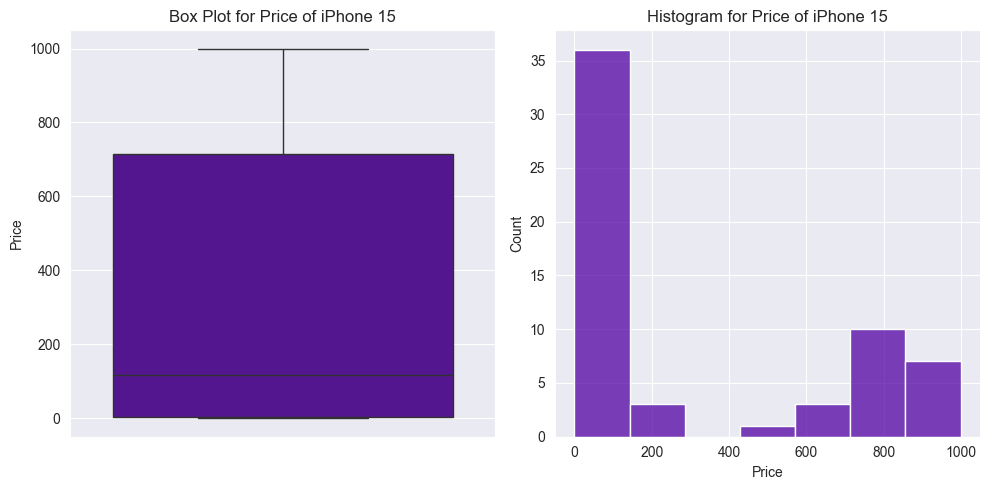

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.set_palette('plasma')

sns.boxplot(df_clean['Price'], ax=axs[0])
axs[0].set_title('Box Plot for Price of iPhone 15')

sns.histplot(df_clean['Price'], ax=axs[1])
axs[1].set_title('Histogram for Price of iPhone 15')

plt.tight_layout()
plt.show()